In [6]:
! pip install -U accelerate
! pip install -U transformers
! pip install datasets

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: C:\Users\moham\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached transformers-4.42.4-py3-none-any.whl.metadata (43 kB)
Using cached transformers-4.42.4-py3-none-any.whl (9.3 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\moham\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\transformers\\models\\deprecated\\trajectory_transformer\\convert_trajectory_transformer_original_pytorch_checkpoint_to_pytorch.py'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: C:\Users\moham\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: C:\Users\moham\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import transformers
print(transformers.__version__)

ModuleNotFoundError: No module named 'transformers.utils'

In [9]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from transformers import AutoModel
import torch
import torch.nn as nn
from transformers import AutoTokenizer
import datasets

ModuleNotFoundError: No module named 'transformers.utils'

In [ ]:
data = pd.read_csv("HC3_data.csv")
data.head()

(1000, 4)


,id,source,label,text
32108,7786,reddit_eli5,human_answers,[It looks like there 's a lot of variety in th...
71898,23254,medicine,chatgpt_answers,[Stinging while urinating after masturbation c...
26775,2453,reddit_eli5,human_answers,[For the sake of doing this like an ELI5 we wi...
49222,578,reddit_eli5,chatgpt_answers,"[The labels on lumber, such as ""2x4"" or ""2x6"",..."
67097,18453,wiki_csai,chatgpt_answers,[A radial basis network (RBF network) is a typ...


In [ ]:
data["label"].value_counts()

label
human_answers      502
chatgpt_answers    498
Name: count, dtype: int64

In [ ]:
data['label'] = data['label'].replace({'human_answers':0, 'chatgpt_answers':1})

In [ ]:
data['text'] = data['text'].astype("string")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 65011 to 33097
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1000 non-null   object
 1   source  1000 non-null   object
 2   label   1000 non-null   int64 
 3   text    1000 non-null   string
dtypes: int64(1), object(2), string(1)
memory usage: 39.1+ KB


In [ ]:
train_ratio = 0.8
test_ratio = 0.1
val_ratio = 0.1

train_data, temp_data = train_test_split(data, test_size=1 - train_ratio, random_state=42)
test_data, val_data = train_test_split(temp_data, test_size=val_ratio/(val_ratio + test_ratio), random_state=42)

In [ ]:
HC3_Dict = datasets.DatasetDict({
    "train": datasets.Dataset.from_dict(train_data),
    "test": datasets.Dataset.from_dict(test_data),
    "validation": datasets.Dataset.from_dict(val_data),
})

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') # HD Plots

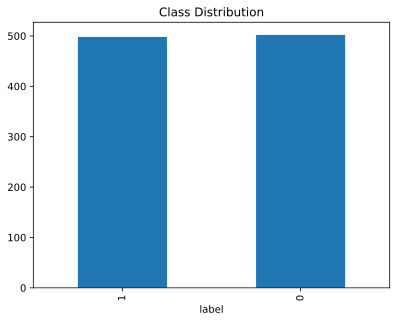

In [ ]:
data['label'].value_counts(ascending=True).plot.bar()
plt.title('Class Distribution')
plt.show()

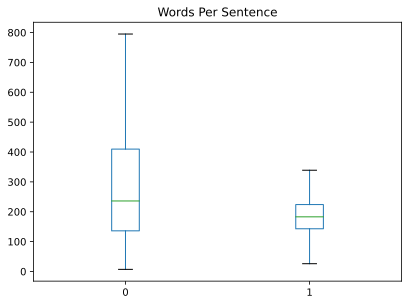

In [ ]:
data['Words Per Sentence'] = data['text'].str.split().apply(len)
data.boxplot('Words Per Sentence', by='label', grid=False, showfliers=False)
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
def tokenize(batch):
    token = tokenizer(batch["text"], padding=True, truncation=True)
    return token

In [ ]:
tokenize(HC3_Dict['train'][:2])

{'input_ids': [[101, 1031, 1000, 2009, 2089, 2022, 4276, 2009, 2000, 25416, 3981, 5897, 2115, 2482, 5414, 2065, 2017, 2064, 2131, 1037, 2896, 3037, 3446, 2030, 2488, 3408, 2006, 2115, 5414, 1012, 2174, 1010, 2045, 2024, 1037, 2261, 2477, 2017, 2323, 5136, 2077, 10561, 2000, 25416, 3981, 5897, 1024, 2115, 4923, 3556, 1024, 2065, 2017, 2031, 5301, 2115, 4923, 3556, 2144, 2017, 2034, 2165, 2041, 2115, 2482, 5414, 1010, 2017, 2089, 2022, 2583, 2000, 7515, 2005, 1037, 2488, 3037, 3446, 2043, 2017, 25416, 3981, 5897, 1012, 1996, 9883, 2920, 1024, 25416, 3981, 12273, 2075, 1037, 2482, 5414, 2064, 9125, 9883, 2107, 2004, 2019, 4761, 3370, 7408, 1010, 4646, 7408, 1010, 1998, 5494, 5366, 1012, 2122, 9883, 2064, 5587, 2039, 1010, 2061, 2009, 1005, 1055, 2590, 2000, 12826, 1996, 2561, 3465, 1997, 25416, 3981, 12273, 2075, 2000, 1996, 4022, 10995, 1012, 1996, 3588, 2744, 2006, 2115, 5414, 1024, 2065, 2017, 2031, 1037, 2312, 4664, 1997, 2115, 5414, 2187, 2000, 3477, 2125, 1010, 2009, 2089, 2025, 202

In [ ]:
train_text_encoded = HC3_Dict.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
train_text_encoded['train'].column_names

['id', 'source', 'label', 'text', 'input_ids', 'attention_mask']

In [ ]:
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [ ]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k, v in batch.items()
    if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state

    return {"hidden state": last_hidden_state[:, 0].cpu().numpy()}

In [ ]:
train_text_encoded.set_format("torch", columns=['input_ids', 'attention_mask', 'label'])

In [ ]:
print(type(train_text_encoded['train']['input_ids']))

<class 'torch.Tensor'>


In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
chat_hidden_state = train_text_encoded.map(
    extract_hidden_states, batched=True)

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
chat_hidden_state["train"].column_names

['id',
 'source',
 'label',
 'text',
 'input_ids',
 'attention_mask',
 'hidden state']

In [ ]:
X_train = np.array(chat_hidden_state["train"]["hidden state"])
X_valid = np.array(chat_hidden_state["validation"]["hidden state"])
y_train = np.array(chat_hidden_state["train"]["label"])
y_valid = np.array(chat_hidden_state["validation"]["label"])
print(X_train.shape, X_valid.shape)

(800, 768) (100, 768)


In [ ]:
pca = PCA(n_components=2)

x_scaled = MinMaxScaler().fit_transform(X_train)
x_2d = pca.fit_transform(x_scaled)
x_2d.shape

(800, 2)

In [ ]:
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.96

In [ ]:
y_pred = lr_clf.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
print(cm)

[[44  3]
 [ 1 52]]


In [ ]:
data["label"].value_counts()

label
0    502
1    498
Name: count, dtype: int64

<Axes: >

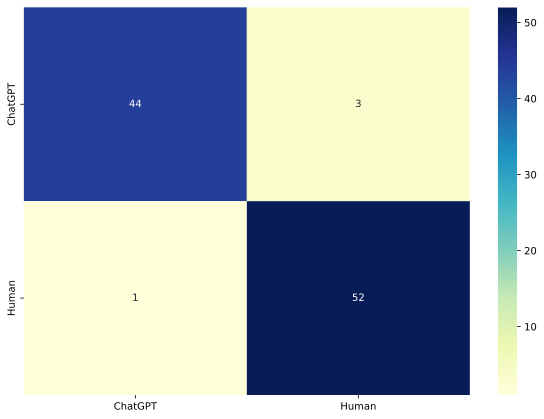

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, index = [i for i in ["ChatGPT","Human"]],
                  columns = [i for i in ["ChatGPT","Human"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="YlGnBu", fmt='g')

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 2
model = (AutoModelForSequenceClassification
        .from_pretrained(model_ckpt, num_labels=num_labels)
        .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    label = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(label, preds, average="weighted")
    acc = accuracy_score(label, preds)
    return {"accuracy": acc, "f1": f1}

In [ ]:
#from huggingface_hub import notebook_login
#notebook_login()

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 16
logging_steps = len(train_text_encoded['train']) // batch_size
model_name = f"distilbert-base-uncased"

training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=4,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    log_level="error",
    remove_unused_columns=True
)

In [ ]:
import accelerate
import transformers

transformers.__version__, accelerate.__version__

('4.33.1', '0.22.0')

In [ ]:
from transformers import DataCollatorForTokenClassification
data_collator = DataCollatorForTokenClassification(tokenizer)

In [ ]:
data_collator

DataCollatorForTokenClassification(tokenizer=DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True), padding=True, max_length=None, pad_to_multiple_of=None, label_pad_token_id=-100, return_tensors='pt')

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
trainer = Trainer(
    model,
    args=training_args,
    compute_metrics = compute_metrics,
    train_dataset=train_text_encoded['train'],
    eval_dataset=train_text_encoded['validation'],
    tokenizer=tokenizer
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.392000,0.187046,0.930000,0.929951
2,0.079100,0.065783,0.990000,0.989993
3,0.019100,0.085472,0.970000,0.969918
4,0.008800,0.022755,0.990000,0.989993


TrainOutput(global_step=200, training_loss=0.12476705923676491, metrics={'train_runtime': 7759.1564, 'train_samples_per_second': 0.412, 'train_steps_per_second': 0.026, 'total_flos': 423895675699200.0, 'train_loss': 0.12476705923676491, 'epoch': 4.0})

In [ ]:
preds_output = trainer.predict(train_text_encoded["validation"])

In [ ]:
preds_output.metrics

{'test_loss': 0.022755024954676628,
 'test_accuracy': 0.99,
 'test_f1': 0.9899929655311024,
 'test_runtime': 91.0232,
 'test_samples_per_second': 1.099,
 'test_steps_per_second': 0.077}

In [ ]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [ ]:
cm_ft = confusion_matrix(y_preds, y_valid)
print(cm_ft)

[[46  0]
 [ 1 53]]


[Text(0.5, 1.0, 'DistlBERT with FineTuning')]

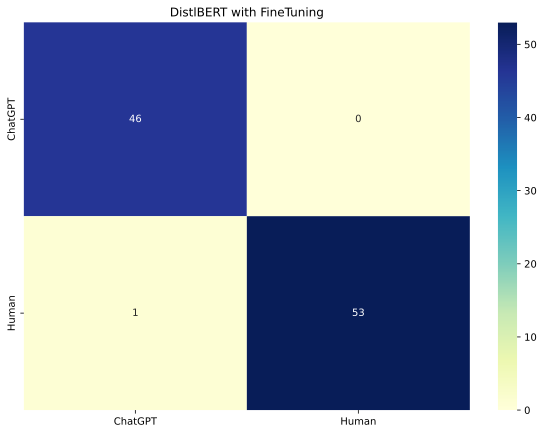

In [ ]:
df_cm_ft = pd.DataFrame(cm_ft, index = [i for i in ["ChatGPT","Human"]],
                  columns = [i for i in ["ChatGPT","Human"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm_ft, annot=True,cmap="YlGnBu", fmt='g').set(title = "DistlBERT with FineTuning")

[Text(0.5, 1.0, 'DistlBERT w/o FineTuning')]

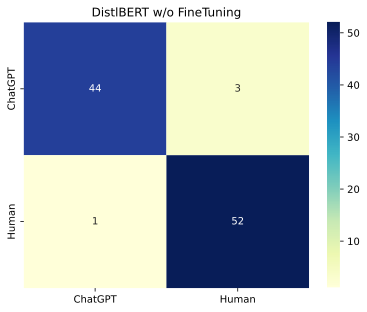

In [ ]:
sn.heatmap(df_cm, annot=True,cmap="YlGnBu", fmt='g').set(title = "DistlBERT w/o FineTuning")